# Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import cv2

from tqdm import tqdm
from tensorflow.python.tools import module_util as _module_util
import tensorflow as tf

In [2]:
class_names = ['building','forest','no changed','road','water','bridge']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [4]:
def load_data():

    datasets = ['C:/Users/lovel/Music/pj/changes due to human activity/train', 'C:/Users/lovel/Music/pj/changes due to human activity/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/lovel/Music/pj/changes due to human activity/train


100%|██████████| 103/103 [00:00<00:00, 1017.20it/s]


Loading C:/Users/lovel/Music/pj/changes due to human activity/test


100%|██████████| 103/103 [00:00<00:00, 1248.23it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 508
Number of testing examples: 508
Each image is of size: (150, 150)


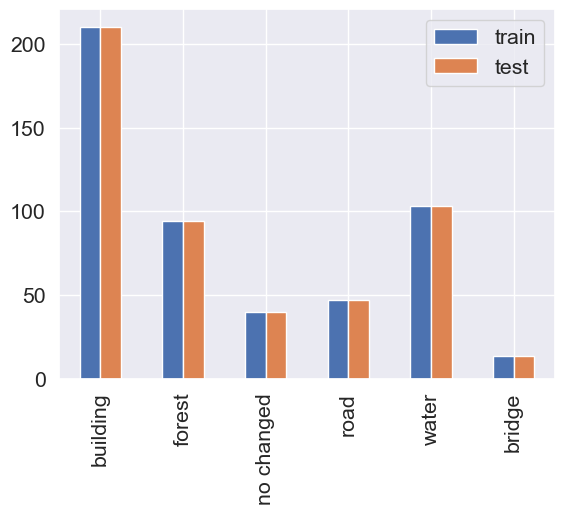

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

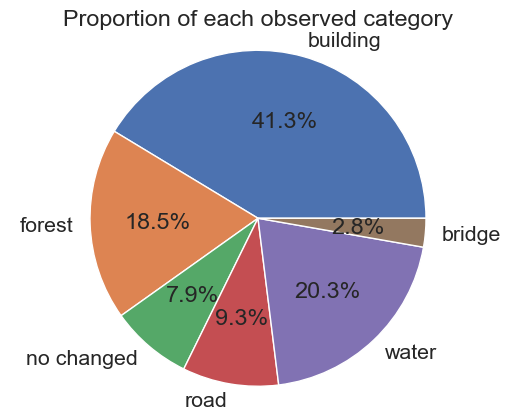

In [9]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0,0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

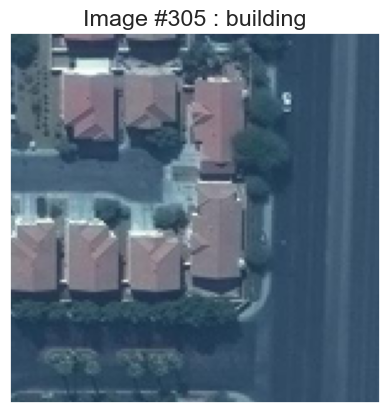

In [12]:
display_random_image(class_names, train_images, train_labels)

In [13]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

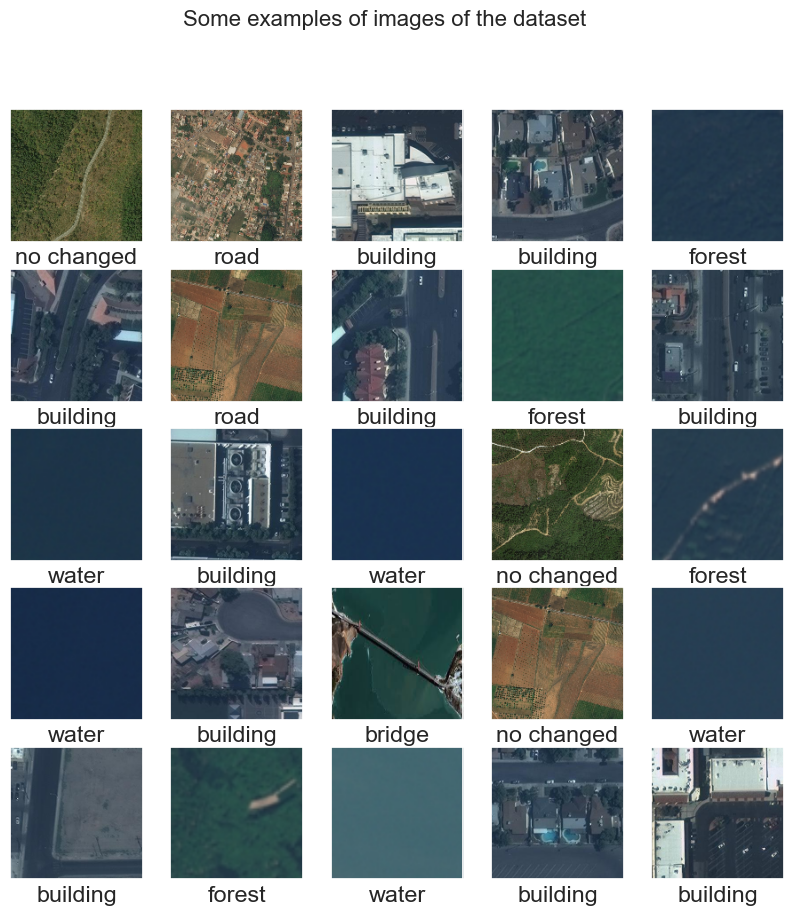

In [14]:
display_examples(class_names, train_images, train_labels)

In [15]:
batch_size =15
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [16]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

C:\Users\lovel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = cnn_model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 727ms/step - accuracy: 0.2213 - loss: 2.7372 - val_accuracy: 0.1373 - val_loss: 1.8389
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 630ms/step - accuracy: 0.3447 - loss: 1.5642 - val_accuracy: 0.4412 - val_loss: 1.1996
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 590ms/step - accuracy: 0.4424 - loss: 1.2012 - val_accuracy: 0.6569 - val_loss: 0.9332
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 598ms/step - accuracy: 0.6774 - loss: 0.9628 - val_accuracy: 0.4902 - val_loss: 0.7955
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 619ms/step - accuracy: 0.5220 - loss: 0.8384 - val_accuracy: 0.7157 - val_loss: 0.6697
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - accuracy: 0.6975 - loss: 0.7004 - val_accuracy: 0.6667 - val_loss: 0.5754
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 589ms/step - accuracy: 0.6990 - loss: 0.5889 - val_accuracy: 0.7157 - val_loss: 0.5053
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 614ms/step - accuracy: 0.7312 - loss: 0.5505 - val_accuracy: 0.7353 - val_loss:

In [19]:
test_loss = cnn_model.evaluate(test_images, test_labels)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9460 - loss: 0.1375


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[3]


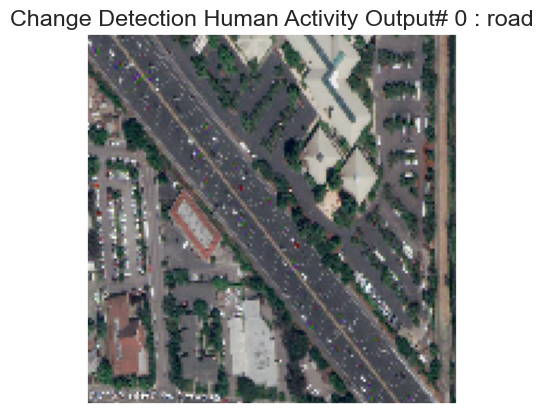

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\lovel\\Pictures\\st.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = cnn_model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Change Detection Human Activity Output# {} : '.format(index) + class_names[pred_labels[index]])
plt.show()

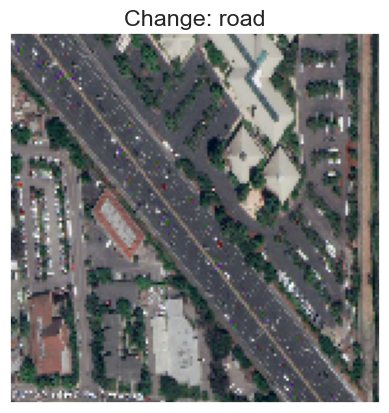

In [24]:
for label in pred_labels:
    plt.figure()
    plt.imshow(test_image[0].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Change: ' + class_names[label])
    plt.show()

In [25]:
import cv2
import numpy as np

def calculate_percentage_change(image1, image2):
    # Read the images
    img1 = cv2.imread(image1)
    img2 = cv2.imread(image2)

    # Resize images to a common size if they have different dimensions
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference between the two grayscale images
    diff = cv2.absdiff(gray1, gray2)

    # Threshold the difference image to identify changes
    _, threshold = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Count the number of changed pixels
    changed_pixels = np.sum(threshold > 0)

    # Calculate the percentage of change
    total_pixels = img2.shape[0] * img2.shape[1]
    percentage_change = (changed_pixels / total_pixels) * 100

    return percentage_change

# Paths to the two images using double backslashes or a raw string
image1_path = "C:\\Users\\lovel\\Pictures\\xx.jpg"
image2_path = r"C:\Users\lovel\Pictures\yy.jpg"


#cv2.imshow("Changes Marking", result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Calculate and print the percentage of change
percentage_change = calculate_percentage_change(image1_path, image2_path)
print(f"Percentage of change: {percentage_change:.2f}%")

Percentage of change: 47.91%


In [26]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image

def identify_changes(image1, image2):
    # Load pre-trained VGG16 model
    model = VGG16(weights='imagenet')

    # Read the images
    img1 = cv2.imread(image1)
    img2 = cv2.imread(image2)

    # Resize images to a common size if they have different dimensions
    img1 = cv2.resize(img1, (224, 224))
    img2 = cv2.resize(img2, (224, 224))

    # Convert images to RGB (VGG16 expects RGB images)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Preprocess images for VGG16 model
    img1_preprocessed = preprocess_input(np.expand_dims(img1_rgb, axis=0))
    img2_preprocessed = preprocess_input(np.expand_dims(img2_rgb, axis=0))

    # Get predictions for the images
    predictions1 = model.predict(img1_preprocessed)
    predictions2 = model.predict(img2_preprocessed)

    # Decode predictions to get human-readable labels
    label1 = decode_predictions(predictions1)[0][0][1]
    label2 = decode_predictions(predictions2)[0][0][1]

    return label1, label2

# Paths to the two images using double backslashes or a raw string
image1_path = "C:\\Users\\lovel\\Pictures\\yy.jpg"
image2_path = r"C:\Users\lovel\Pictures\xx.jpg"

# Identify and print the semantic content of changes
change1, change2 = identify_changes(image1_path, image2_path)
print(f"Change in the first image: {change1}")
print(f"Change in the second image: {change2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Change in the first image: cliff
Change in the second image: volcano


In [10]:
import cv2
import numpy as np

def find_differences(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Find absolute difference between the two images
    diff = cv2.absdiff(gray1, gray2)

    # Threshold the difference image
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Find contours of the thresholded difference image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image2
    result = image2.copy()
    cv2.drawContours(result, contours, -1, (0, 0, 255), 2)

    return result

# Load images
image1 = cv2.imread("C:\\Users\\lovel\\Pictures\\a1.jpg")
image2 = cv2.imread('C:\\Users\\lovel\\Pictures\\a2.jpg')

# Ensure images have the same dimensions
if image1.shape == image2.shape:
    # Find and highlight differences
    output = find_differences(image1, image2)

    # Display output image
    cv2.imshow('Differences', output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Images must have the same dimensions.")